# hdf5

Importamos librería hdf5 para cargar los datos de interferometría. Importamos las utilidades con las funciones para triangular y visualizar.

In [1]:
import h5py
import numpy as np
import pandas as pd
from utilities import *

In [2]:
#Los Archivos hdf5 funcionan como diccionario y se pueden ispeccionar con keys
h5_vel = h5py.File("../data/c_1/geo_velocity.h5")
h5_vel.keys()

<KeysViewHDF5 ['velocity', 'velocityStd']>

In [3]:
h5_vel["velocity"]

<HDF5 dataset "velocity": shape (1327, 1069), type "<f4">

In [4]:
#Los atributos contienen metadatos
h5_vel.attrs.keys()

<KeysViewHDF5 ['ALOOKS', 'ANTENNA_SIDE', 'AZIMUTH_PIXEL_SIZE', 'BANDS', 'CENTER_INCIDENCE_ANGLE', 'CENTER_LINE_UTC', 'DATA_TYPE', 'DATE12', 'EARTH_RADIUS', 'END_DATE', 'FILE_LENGTH', 'FILE_PATH', 'FILE_TYPE', 'HEADING', 'HEIGHT', 'INTERLEAVE', 'ISCE_VERSION', 'LAT_REF1', 'LAT_REF2', 'LAT_REF3', 'LAT_REF4', 'LENGTH', 'LON_REF1', 'LON_REF2', 'LON_REF3', 'LON_REF4', 'NCORRLOOKS', 'OG_FILE_PATH', 'ORBIT_DIRECTION', 'PLATFORM', 'POLARIZATION', 'PRF', 'PROCESSOR', 'PROJECT_NAME', 'P_BASELINE_BOTTOM_HDR', 'P_BASELINE_TOP_HDR', 'RANGE_PIXEL_SIZE', 'REF_DATE', 'REF_LAT', 'REF_LON', 'REF_X', 'REF_Y', 'RLOOKS', 'STARTING_RANGE', 'START_DATE', 'UNIT', 'WAVELENGTH', 'WIDTH', 'X_FIRST', 'X_STEP', 'X_UNIT', 'Y_FIRST', 'Y_STEP', 'Y_UNIT', 'access_mode', 'altitude', 'azimuthPixelSize', 'azimuthResolution', 'beam_mode', 'beam_swath', 'byte_order', 'data_type', 'earthRadius', 'family', 'file_name', 'firstFrameNumber', 'first_frame', 'image_type', 'lastFrameNumber', 'last_frame', 'length', 'mintpy.compute

In [5]:
h5_coh = h5py.File("../data/c_1/geo_temporalCoherence.h5")

Convertimos los archivos hdf5 a objetos numpy

In [6]:
c1 = np.asarray(h5py.File("../data/c_1/geo_velocity.h5")["velocity"])
c2 = np.asarray(h5py.File("../data/c_2/geo_velocity.h5")["velocity"])
c3 = np.asarray(h5py.File("../data/c_3/geo_velocity.h5")["velocity"])

nan1= np.isnan(c1)
nan2= np.isnan(c2)
nan3= np.isnan(c3)

c1 = np.where(nan1, 0, c1)
c2 = np.where(nan2, 0, c2)
c3 = np.where(nan3, 0, c3)

In [7]:
coh1 = np.asarray(h5py.File("../data/c_1/geo_temporalCoherence.h5")["temporalCoherence"])
coh2 = np.asarray(h5py.File("../data/c_2/geo_temporalCoherence.h5")["temporalCoherence"])
coh3 = np.asarray(h5py.File("../data/c_3/geo_temporalCoherence.h5")["temporalCoherence"])

coh1 = np.where(np.isnan(coh1), 0, coh1)
coh2 = np.where(np.isnan(coh2), 0, coh2)
coh3 = np.where(np.isnan(coh3), 0, coh3)

In [8]:
print(c1.shape)
print(c2.shape)
print(c3.shape)

(1327, 1069)
(1327, 1069)
(1327, 1069)


In [9]:
np.save("../data/c_1/vel", c1)
np.save("../data/c_2/vel", c2)
np.save("../data/c_3/vel", c3)

# Georeferencias
### Extents
Cada medición (c_1, c_2, c_3) tiene su respectivo extent, que contiene las coordenadas de las esquinas de la matriz, necesarias para relacionarla con los polígonos

In [10]:
extent1 = pd.read_csv("https://raw.githubusercontent.com/alcazar90/rock-glacier-detection/main/data/c_1/extent.tsv", 
                      sep="\t", header=None).to_numpy()
extent2 = pd.read_csv("https://raw.githubusercontent.com/alcazar90/rock-glacier-detection/main/data/c_2/extent.tsv", 
                      sep="\t", header=None).to_numpy()
extent3 = pd.read_csv("https://raw.githubusercontent.com/alcazar90/rock-glacier-detection/main/data/c_3/extent.tsv", 
                      sep="\t", header=None).to_numpy()

In [11]:
extent1

array([[-28.11996841, -69.82037354],
       [-28.11996841, -69.42983246],
       [-28.52018356, -69.82037354],
       [-28.52018356, -69.42983246]])

Vemos que c3 tiene un extent levemente distinto

In [12]:
extent1-extent2

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.]])

In [13]:
extent1-extent3

array([[9.540e-06, 0.000e+00],
       [9.540e-06, 0.000e+00],
       [1.526e-05, 0.000e+00],
       [1.526e-05, 0.000e+00]])

### Polígonos de glaciares
Adicionalmente, se cuenta con los polígonos de los glaciares.

In [14]:
glaciar_1 = pd.read_csv("https://raw.githubusercontent.com/alcazar90/rock-glacier-detection/main/data/glaciares/glaciar_1_strict.tsv", 
                        sep="\t", header=None).to_numpy()[:-1]
glaciar_2 = pd.read_csv("https://raw.githubusercontent.com/alcazar90/rock-glacier-detection/main/data/glaciares/glaciar_2_strict.tsv", 
                        sep="\t", header=None).to_numpy()[:-1]
glaciar_3 = pd.read_csv("https://raw.githubusercontent.com/alcazar90/rock-glacier-detection/main/data/glaciares/glaciar_3_strict.tsv",
                        sep="\t", header=None).to_numpy()[:-1]
glaciar_4 = pd.read_csv("https://raw.githubusercontent.com/alcazar90/rock-glacier-detection/main/data/glaciares/glaciar_4_strict.tsv", 
                        sep="\t", header=None).to_numpy()[:-1]
glaciar_5 = pd.read_csv("https://raw.githubusercontent.com/alcazar90/rock-glacier-detection/main/data/glaciares/glaciar_5_strict.tsv", 
                        sep="\t", header=None).to_numpy()[:-1]
glaciar_6 = pd.read_csv("https://raw.githubusercontent.com/alcazar90/rock-glacier-detection/main/data/glaciares/glaciar_6_strict.tsv", 
                        sep="\t", header=None).to_numpy()[:-1]

# Invertimos las coordenadas para que se ajusten al formato Filas / Columnas
glaciar_1 = glaciar_1[:,[1,0]]
glaciar_2 = glaciar_2[:,[1,0]]
glaciar_3 = glaciar_3[:,[1,0]]
glaciar_4 = glaciar_4[:,[1,0]]
glaciar_5 = glaciar_5[:,[1,0]]
glaciar_6 = glaciar_6[:,[1,0]]

Guardamos los polígonos en un diccionario para mayor comodidad.

In [15]:
glaciares = {
    "glaciar_1": glaciar_1,
    "glaciar_2": glaciar_2,
    "glaciar_3": glaciar_3,
    "glaciar_4": glaciar_4,
    "glaciar_5": glaciar_5,
    "glaciar_6": glaciar_6,
}

glaciares_list = list(glaciares.values())

### Polígonos de areas con algún glaciar
Adicionalmente, cargamos los polígonos de las áreas que podrían tener glaciares. Esto precisamente para identificar las áreas que con seguridad no tienen glaciares

In [16]:
glaciar_area_1 = pd.read_csv("https://raw.githubusercontent.com/alcazar90/rock-glacier-detection/main/data/glaciares/glaciar_area_1.tsv", 
                        sep="\t", header=None).to_numpy()[:-1]
glaciar_area_2 = pd.read_csv("https://raw.githubusercontent.com/alcazar90/rock-glacier-detection/main/data/glaciares/glaciar_area_2.tsv", 
                        sep="\t", header=None).to_numpy()[:-1]
glaciar_area_3 = pd.read_csv("https://raw.githubusercontent.com/alcazar90/rock-glacier-detection/main/data/glaciares/glaciar_area_3.tsv", 
                        sep="\t", header=None).to_numpy()[:-1]
glaciar_area_4 = pd.read_csv("https://raw.githubusercontent.com/alcazar90/rock-glacier-detection/main/data/glaciares/glaciar_area_4.tsv", 
                        sep="\t", header=None).to_numpy()[:-1]
argentina = pd.read_csv("https://raw.githubusercontent.com/alcazar90/rock-glacier-detection/main/data/glaciares/argentina.tsv", 
                        sep="\t", header=None).to_numpy()[:-1]

glaciar_area_1 = glaciar_area_1[:,[1,0]]
glaciar_area_2 = glaciar_area_2[:,[1,0]]
glaciar_area_3 = glaciar_area_3[:,[1,0]]
glaciar_area_4 = glaciar_area_4[:,[1,0]]
argentina = argentina[:,[1,0]]

In [17]:
con_glaciares = {
    "glaciar_area_1": glaciar_area_1,
    "glaciar_area_2": glaciar_area_2,
    "glaciar_area_3": glaciar_area_3,
    "glaciar_area_4": glaciar_area_4,
    "argentina": argentina,
}

con_glaciares_list = list(con_glaciares.values())

# Triangulación
### Triangulación de glaciares
Se utiliza matrix_polygon que a su vez está basada en in_polygon para determinar qué pixeles se encuentran dentro de cada polígono

In [18]:
en_glaciares_c1 = []
for glaciar in glaciares:
    print("Triangulando", glaciar)
    en_glaciares_c1.append(matrix_polygon(c1.shape, extent1, glaciares[glaciar]))

Triangulando glaciar_1
Triangulando glaciar_2
Triangulando glaciar_3
Triangulando glaciar_4
Triangulando glaciar_5
Triangulando glaciar_6


Fusionamos y guardamos la matriz

In [19]:
en_glaciares_c1 = np.any(en_glaciares_c1, axis=0)
np.save("../data/masks/en_glaciar_c1", en_glaciares_c1)

Visualizamos para asegurarnos que se hizo correctamente

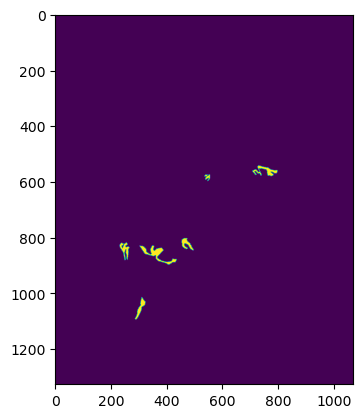

In [20]:
plt.imshow(en_glaciares_c1)

Repetimos el proceso para c3, ya que su extent es levemente distinto

In [21]:
en_glaciares_c3 = []
for glaciar in glaciares:
    print("Triangulando", glaciar)
    en_glaciares_c3.append(matrix_polygon(c3.shape, extent3, glaciares[glaciar]))

en_glaciares_c3 = np.any(en_glaciares_c3, axis=0)
np.save("../data/masks/en_glaciar_c3", en_glaciares_c3)

Triangulando glaciar_1
Triangulando glaciar_2
Triangulando glaciar_3
Triangulando glaciar_4
Triangulando glaciar_5
Triangulando glaciar_6


Las diferencias en extent son lo suficientemente grandes para que haya diferencias en las triangulaciones

In [22]:
np.sum(en_glaciares_c1 != en_glaciares_c3)

32

### Triangulación de áreas con glaciares
Repetimos el proceso con los polígonos de áreas con glaciares.

In [23]:
con_glaciares_c1 = []
for area in con_glaciares:
    print("Triangulando", area)
    con_glaciares_c1.append(matrix_polygon(c1.shape, extent1, con_glaciares[area]))

Triangulando glaciar_area_1
Triangulando glaciar_area_2
Triangulando glaciar_area_3
Triangulando glaciar_area_4
Triangulando argentina


Fusionamos. Como realmente de este proceso nos interesan las áreas **sin glaciares**, le aplicamos una negación para obtener el complemento de la matriz booleana y la guardamos.

In [24]:
con_glaciares_c1 = np.any(con_glaciares_c1, axis=0)
con_glaciares_c1 = np.logical_not(con_glaciares_c1)
np.save("../data/masks/sin_glaciar_c1", con_glaciares_c1)

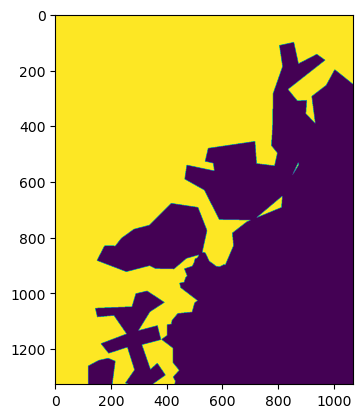

In [25]:
plt.imshow(con_glaciares_c1)

Ahora lo mismo con c3

In [26]:
con_glaciares_c3 = []
for area in con_glaciares:
    print("Triangulando", area)
    con_glaciares_c3.append(matrix_polygon(c3.shape, extent3, con_glaciares[area]))

Triangulando glaciar_area_1
Triangulando glaciar_area_2
Triangulando glaciar_area_3
Triangulando glaciar_area_4
Triangulando argentina


In [27]:
con_glaciares_c3 = np.any(con_glaciares_c3, axis=0)
con_glaciares_c3 = np.logical_not(con_glaciares_c3)
np.save("../data/masks/sin_glaciar_c3", con_glaciares_c3)

# Visualización
Primero, crearemos nuestros colormaps para ver los datos de forma más adecuada. alpha y glow son colormaps transparentes para poder ver más de una matriz en el mismo imshow. Fluor es una matriz divergente (Como "PiYG") para destacar valores negativos y positivos.

In [28]:
colors = np.column_stack((np.ones((256, 3)), np.linspace(0, 1, 256)))
alpha = LinearSegmentedColormap.from_list(name = "alpha", colors=colors)
glow = LinearSegmentedColormap.from_list(name = "glow", colors=colors*np.array([0.97, 0.58, 0.2, 1]))
danger = LinearSegmentedColormap.from_list(name = "danger", colors=colors*np.array([0.85, 0.2, 0.45, 1]))
sky = LinearSegmentedColormap.from_list(name = "sky", colors=colors*np.array([0.25, 0.45, 0.95, 1]))

colors2 = np.array([[0, .95, 1,1], [0,0,0,1], [.75,.9,0,1]])
fluor = LinearSegmentedColormap.from_list(name = "fluor", colors=colors2)

La clase "mapper" automatiza todas las transformaciones tediosas de coordenadas para permitir visualizar en el mismo imshow tanto polígonos como matrices, con diferentes cmaps. Con subset se puede hacer zoom y con center_scale se puede fijar que el centro del colormap sea en 0. Incluye la posibilidad de dibujar mapas no rectangulares con el sistema de 4 coordenadas. De ser así, realiza los cálculos al inicializar la clase para que las transformaciones sean rápidas.

In [43]:
mapper1 = mapper(extent1, c1.shape)
mapper3 = mapper(extent3, c3.shape)

Velocity de c3 con los polígonos de glaciares sobrepuestos. Se utiliza un colormap que es negro para velocidades cero.

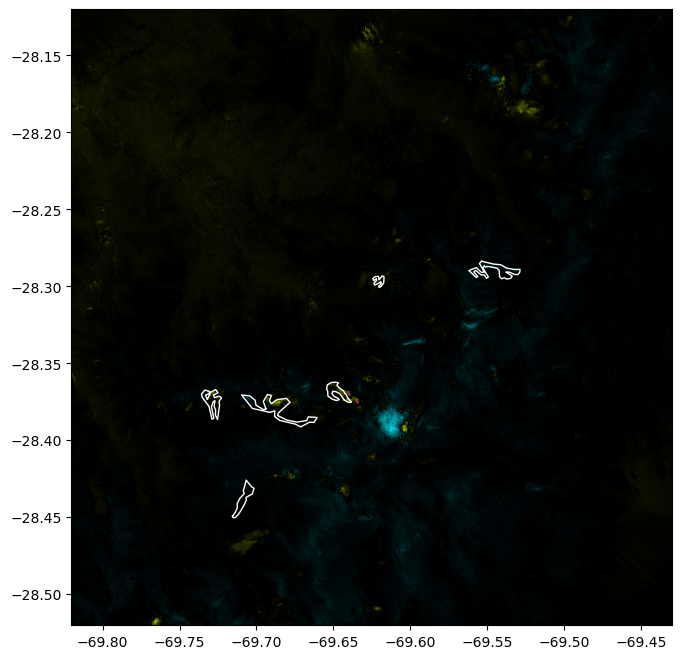

In [30]:
mapper3.draw([c3, -(coh3*np.logical_not(nan3))], cmaps=[fluor, danger], center_scale=[True, False],
          glaciares = glaciares_list, linewidth=1)

Lo mismo pero marcando los pixeles de los glaciares

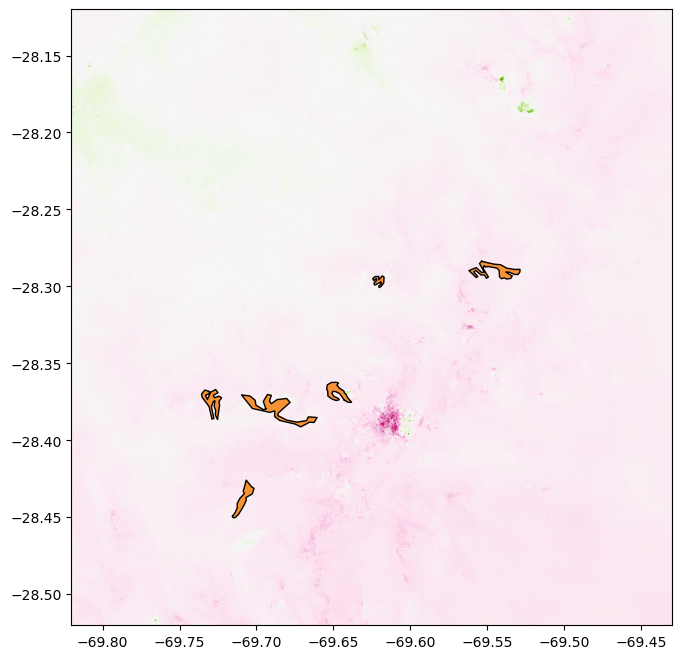

In [31]:
mapper1.draw([c1, en_glaciares_c1], cmaps=["PiYG", glow], glaciares = glaciares_list,
          center_scale=[True, False], linewidth=1, linecol="black")

Zoom a cada glaciar

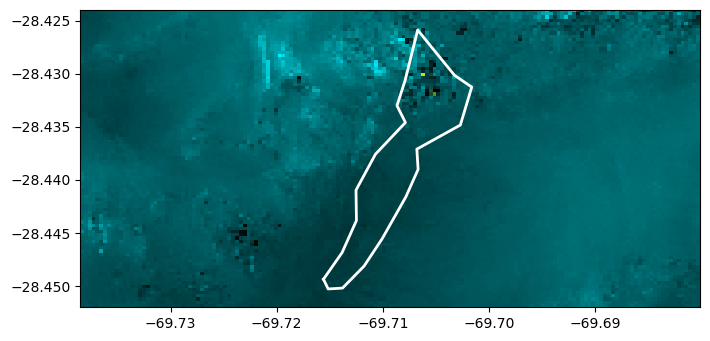

In [32]:
mapper1.draw(c1, center_scale=True, glaciares = glaciar_1, cmaps=fluor, linewidth=2,
          linecol="white", subset=[[.76, .83], [.21, .36]])

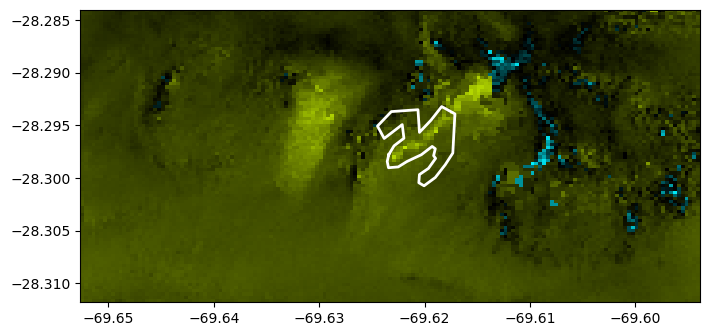

In [33]:
mapper1.draw(c2, glaciares = glaciar_2, cmaps=fluor, center_scale=True, linewidth=2, 
          linecol="white", subset=[[.41, .48], [.43, .58]])

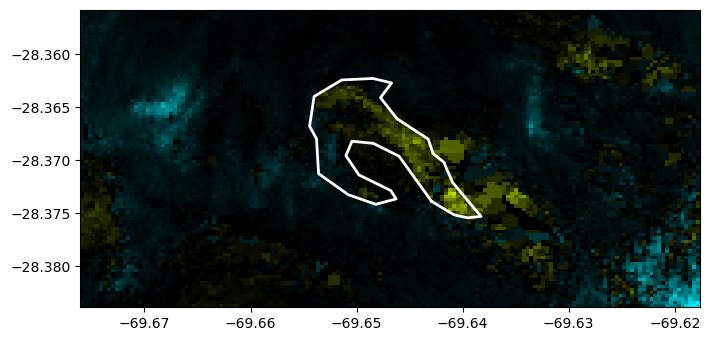

In [34]:
mapper3.draw(c3, linewidth=2, glaciares = glaciar_3, cmaps=fluor, center_scale=True,
          linecol="white", subset=[[.59, .66], [.37, .52]])

Nos quedamos con c3.

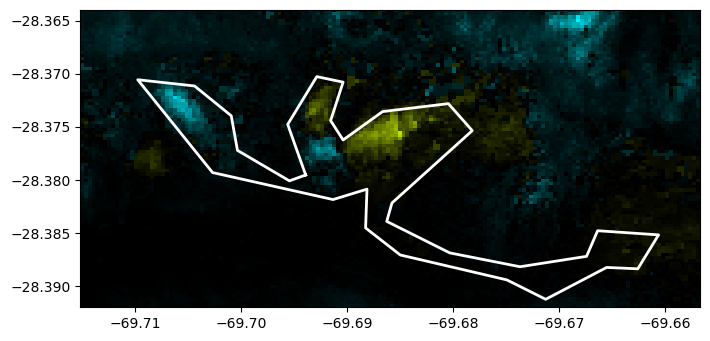

In [35]:
mapper3.draw(c3, linewidth=2, glaciares = glaciar_4, cmaps=fluor, center_scale=True,
          linecol="white", subset=[[.61, .68], [.27, .42]])

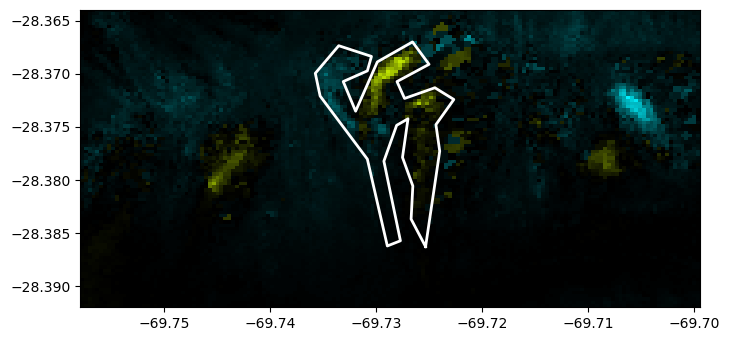

In [36]:
mapper3.draw(c3, linewidth=2, glaciares = glaciar_5, cmaps=fluor, center_scale=True,
          linecol="white", subset=[[.61, .68], [.16, .31]])

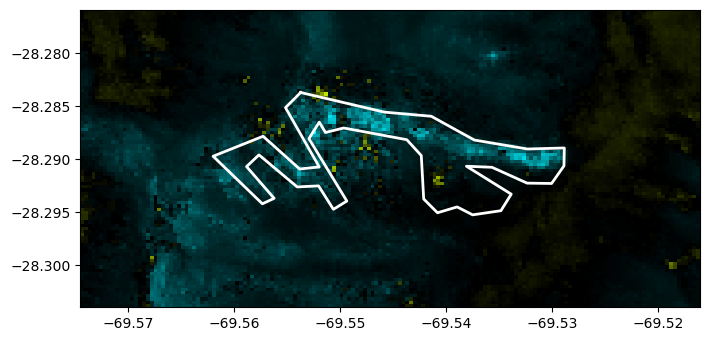

In [37]:
mapper3.draw(c3, linewidth=2, glaciares = glaciar_6, cmaps=fluor, center_scale=True,
          linecol="white", subset=[[.39, .46], [.63, .78]])

Ver cómo calza el polígono con los pixeles marcados

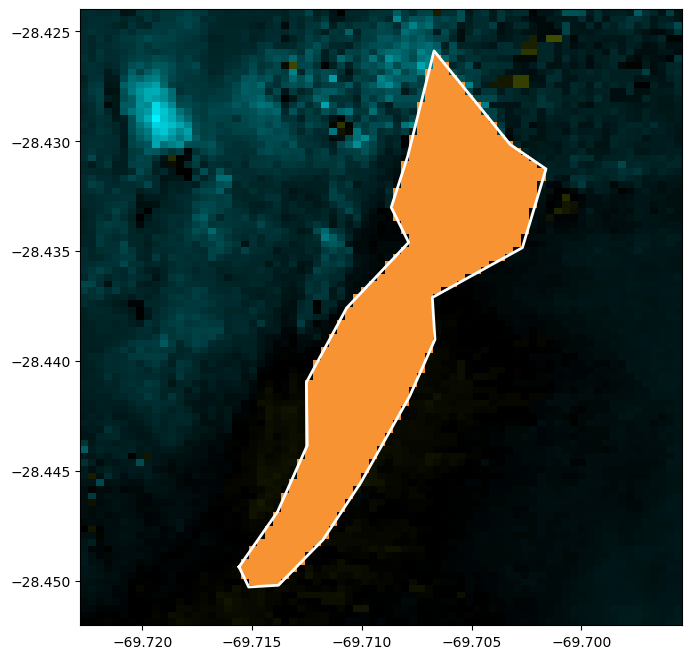

In [38]:
mapper3.draw([c3, en_glaciares_c3], center_scale=[True, False], cmaps=[fluor, glow], glaciares = glaciar_1, 
          linewidth=2, subset=[[.76, .83], [.25, .32]])

Una muestra de cómo maneja geometrías no rectangulares

In [39]:
extent_deforme = np.array([
    [1, 5],
    [4, 3],
    [2, 2],
    [3, 1]
])

mapper_d = mapper(extent_deforme, c1.shape)

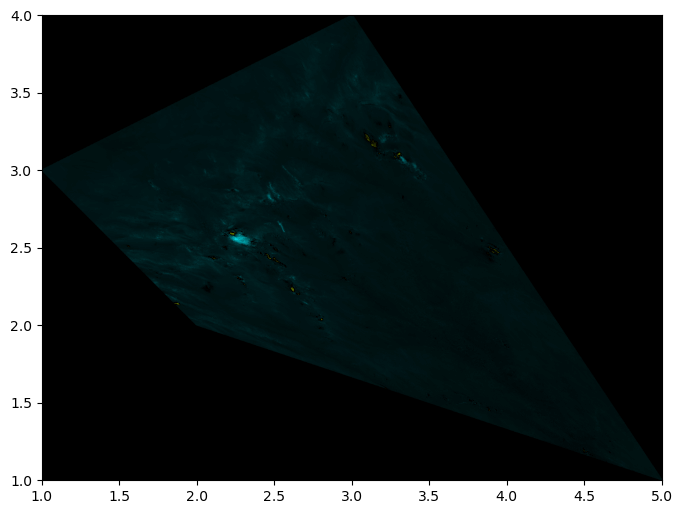

In [40]:
mapper_d.draw(c3-.01, cmaps = fluor, center_scale=True)

Visualicemos áreas sin glaciar

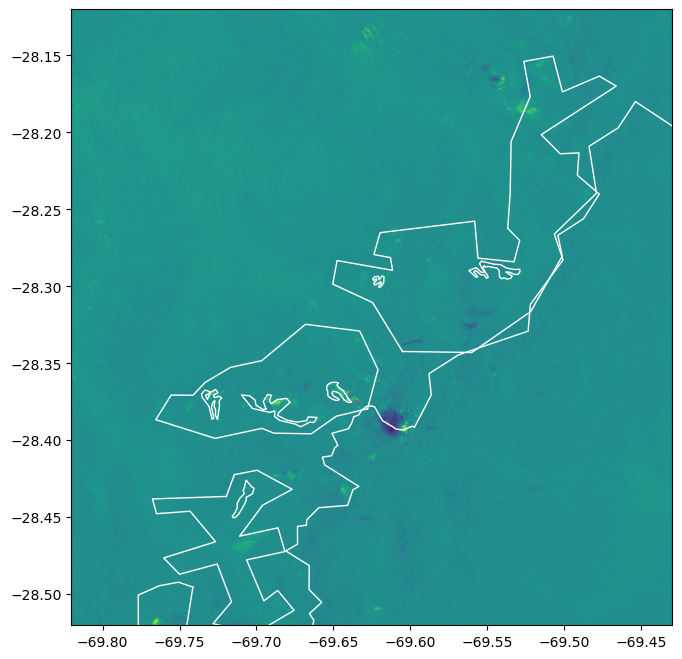

In [47]:
mapper3.draw([c3, -(coh3*np.logical_not(nan3))], cmaps=["viridis", danger], center_scale=[True, False],
          glaciares = glaciares_list + con_glaciares_list, linewidth=1, force_extent = True)